### Topic modelling with Latent Dirichlet Allocation (LDA)  
https://towardsdatascience.com/topic-modelling-in-python-with-spacy-and-gensim-dc8f7748bdbf  
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import spacy
# import pyLDAvis.gensim_models
# pyLDAvis.enable_notebook()# Visualise inside a notebook
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

Sometimes costumers select the wrong reason.  
1. Data cleaning and break down all the documents into tokens.  
2. From the tokens, build a dictionary that gives each token a unique ID number, 
3. which can then be used to create a corpus or Bag of Words representing the frequency of the tokens.
4. Use my dictionary and corpus to build a range of topics and try to find the optimal number of topics.
5. The last step is to find the distribution of topics in each document 

In [2]:
data = pd.read_csv("D:\\MS DATA SCIENCE\\NLP TESE\\data\\data_processed.csv")
data.head()

,Unnamed: 0.1,Unnamed: 0,date,title,reason,description,zone,brand_replies,dates_brand_replies,user_replies,dates_user_replies,narrative_tfidf,narrative_embeddings,narrative_bert,narrative_tfidf_title,narrative_bert_title,narrative_embeddings_title,tfidf_title
0,0,0,2021-10-11 12:26:32,CTT - Encomenda entregue danificada e com etiq...,Mau Serviço Prestado,Bom dia venho por este meio apresentar uma rec...,Lisboa,"Estimado(a) Cliente, Nuno,\r\n\r\nInformamos q...","2021-10-11 12:35:57, 2021-10-13 13:22:26, 2021...",A situação fica resolvida apenas tendo que abr...,"2021-10-22 10:50:49, 2021-10-22 12:13:16, 2021...",bom dia venho meio apresentar reclamação ctt e...,bom dia venho por este meio apresentar uma rec...,Bom dia venho por este meio apresentar uma rec...,ctt encomenda entregar danificar etiqueta envi...,ctt - encomenda entregue danificada e com etiq...,ctt - encomenda entregue danificada e com etiq...,ctt encomenda entregar danificar etiqueta envi...
1,1,1,2021-08-31 23:20:15,CTT - Carta com certificado rasgado!,Condições de entrega,- Boa Noite!\r\n\r\n- Venho por este meio recl...,Coimbra,"Estimado(a) Cliente, Lilia Alexandra Pimentel,...","2021-08-31 23:20:16, 2021-09-02 13:31:01,",NaN,NaN,bom noite venho meio reclamar data ás durante ...,- boa noite!\r\n\r\n- venho por este meio recl...,- Boa Noite! - Venho por este meio reclamar qu...,ctt carta certificar rasgar bom noite venho me...,ctt - carta com certificado rasgado! - Boa No...,ctt - carta com certificado rasgado ! - boa no...,ctt carta certificar rasgar
2,2,2,2021-02-01 19:08:32,CTT - Encomenda registada que nunca chegou ao ...,Atraso de entrega,"Boa tarde,\r\nNo dia 17 de Dezembro de 2020 en...",Aveiro,"Estimado(a) Cliente, Ana Cristina Costa Soares...","2021-02-01 19:08:36, 2021-02-02 12:08:33, 2021...","Olá boa tarde,\r\nAté agora continua tudo igua...","2021-02-18 16:26:12, 2021-02-18 16:27:35, 2021...",bom tarde dia dezembro enviar encomenda França...,"boa tarde,\r\nno dia 00 de dezembro de 0000 en...","Boa tarde, No dia 17 de Dezembro de 2020 envie...",ctt encomenda registar nunca chegar destine o ...,ctt - encomenda registada que nunca chegou ao ...,ctt - encomenda registada que nunca chegou ao ...,ctt encomenda registar nunca chegar destine o
3,3,3,2018-04-19 09:04:34,CTT - Correio Verde,Atraso de entrega,"Bom dia,\n\nPretendia esclarecer uma situação ...",Lisboa,Exmo. Senhor\n\nBruno Garcia \n\nGostaríamos d...,"2018-04-20 10:16:13,",Situação resolvida! Obrigado.,"2018-04-20 10:28:48,",bom dia pretender esclarecer situação ocorrer ...,"bom dia,\n\npretendia esclarecer uma situação ...","Bom dia, Pretendia esclarecer uma situação que...",ctt correio verde bom dia pretender esclarecer...,"ctt - correio verde Bom dia, Pretendia esclar...","ctt - correio verde bom dia,\n\npretendia escl...",ctt correio verde
4,4,4,2019-07-04 10:20:41,"CTT - Aviso de recepção da carta registada, pr...",Atraso de entrega,venho por este meio solicitar a vossa ajuda pa...,Porto,Exmo (a). Senhor (a) \r\n\r\nGostaríamos de ag...,"2019-07-05 10:30:04, 2020-07-24 13:24:17,",NaN,NaN,venho meio solicitar vosso ajudar saber onde e...,venho por este meio solicitar a vossa ajuda pa...,venho por este meio solicitar a vossa ajuda pa...,ctt aviso recepção carta registar preciso urge...,"ctt - aviso de recepção da carta registada, pr...","ctt - aviso de recepção da carta registada , p...",ctt aviso recepção carta registar preciso urge...


In [3]:
list_tokens=[]
for item in data['narrative_tfidf_title']:
    tokens = nltk.word_tokenize(item)
    list_tokens+=[tokens]

In [4]:
data['tokens']=list_tokens

# build a dict and corpus

In [7]:
# Compute bigrams.
from gensim.models import Phrases
from gensim import corpora
docs=data['tokens']

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=20, threshold=1)
trigram = Phrases(bigram[docs], min_count=20, threshold=1)

# Add the bigrams and trigrams to the dictionary
dictionary = corpora.Dictionary(trigram[bigram[docs]])

# Convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in trigram[bigram[docs]]]

In [36]:
# import gensim.corpora as corpora
# # Create Dictionary
# # Dictionary Object from Gensim, which maps each word to their unique ID:
# dictionary = corpora.Dictionary(docs)

# # filter out low-frequency and high-frequency tokens, also limit the vocabulary to a max of 1000 words:
# # No_below: Tokens that appear in less than 5 documents are filtered out.
# # No_above: Tokens that appear in more than 50% of the total corpus are also removed as default.
# dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=5000)

In [37]:
# # Create Corpus
# # counts the number of occurrences of each distinct word, converts the word to its integer word
# corpus = [dictionary.doc2bow(doc) for doc in docs]
# print(corpus[:1][0][:30])

[(0, 1), (1, 5), (2, 1), (3, 2), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 5), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 2), (29, 3)]


# build model

In [8]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=8,
                                      random_state=100)

In [9]:
# Print the Keyword in the 10 topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.012*"encomenda" + 0.012*"ctt" + 0.009*"entregar" + 0.007*"ter" + 0.007*"dia" + 0.006*"fazer" + 0.004*"ver" + 0.004*"poder" + 0.004*"situação" + 0.004*"dizer"
Topic: 1 
Words: 0.020*"ctt" + 0.018*"encomenda" + 0.017*"dia" + 0.008*"entregar" + 0.005*"dizer" + 0.005*"mesmo" + 0.005*"enviar" + 0.004*"pois" + 0.004*"fazer" + 0.004*"ter"
Topic: 2 
Words: 0.024*"ctt" + 0.008*"encomenda" + 0.007*"enviar" + 0.006*"entregar" + 0.006*"carta" + 0.006*"dia" + 0.005*"ter" + 0.005*"ir" + 0.004*"receber" + 0.004*"correio"
Topic: 3 
Words: 0.021*"ctt" + 0.015*"encomenda" + 0.008*"dia" + 0.007*"dizer" + 0.007*"entregar" + 0.006*"fazer" + 0.006*"vez" + 0.005*"ter" + 0.005*"porque" + 0.005*"enviar"
Topic: 4 
Words: 0.017*"encomenda" + 0.009*"ctt" + 0.008*"correio" + 0.007*"dia" + 0.006*"dizer" + 0.006*"pois" + 0.006*"fazer" + 0.005*"mesmo" + 0.005*"casa" + 0.005*"ir"
Topic: 5 
Words: 0.014*"entregar" + 0.014*"ctt" + 0.008*"dia" + 0.007*"encomenda" + 0.007*"pois" + 0.007*"porque" + 0.006

# optimal nr of topics

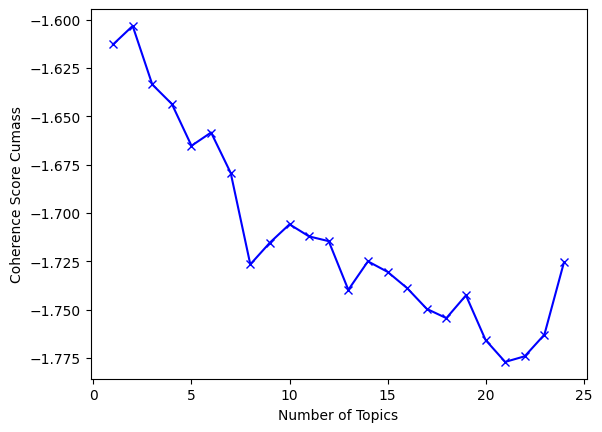

In [10]:
topics = []
score = []
for i in range(1,25,1):
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=i, random_state=100)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    topics.append(i)
    score.append(cm.get_coherence())
_=plt.plot(topics, score, 'bx-')
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score Cumass')
plt.show()

d:\ms data science\nlp tese\envs\env1\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
d:\ms data science\nlp tese\envs\env1\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


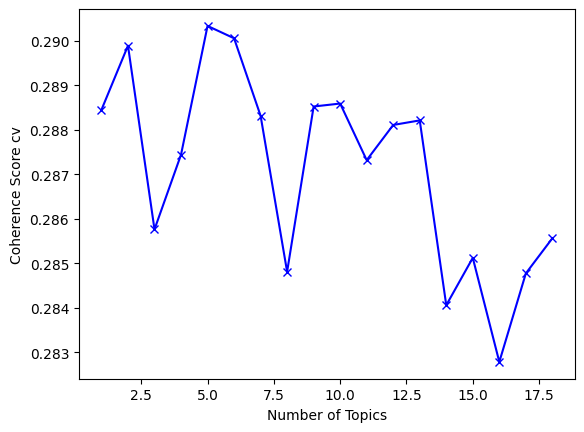

In [11]:
topics = []
score = []
for i in range(1,25,1):
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=i, random_state=100)
    cm = CoherenceModel(model=lda_model, texts = data['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
    topics.append(i)
    score.append(cm.get_coherence())
_=plt.plot(topics, score, 'bx-')
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score cv')
plt.show()

# visualize

In [17]:
lda_model1 = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=8, random_state=100)
cm = CoherenceModel(model=lda_model1, texts = data['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
print(cm.get_coherence())

0.2848112175983207


In [18]:
data['narrative_bert'][0]

'Bom dia venho por este meio apresentar uma reclamação aos CTT. Enviei uma encomenda cujo conteúdo era uma figura de resina artesanal. O envio foi destinado a um amigo de Israel. O envio foi feito no dia 2021-09-09 no posto de ctt da Aboboda. Código: RT106043625PT O envio estava muito bem ambalado e protegido, tinha uma segunda caixa onde estava a figura protegita com muito papel bolha e esponjas. Infelizmente o meu amigo recebeu uma caixa que chegou quase destruida, figura partida, e chegou passado um mês. Mas aqui vão os problemas todos: - Levou muito tempo a chegar - A caixa chegou destruida - A caixa tinha sido aberta e tinha as etiquetas mudadas - A caixa tinha um segundo nome de remetente português e um novo remetente em Israel. - Pior: A figura chegou danificada e partida, sem concerto. Nas fotos envidas tinha uma etiqueta com novo tracking number alterado e com remetente novo de Braga e destino para outra senhora, que nem sei quem é. Tracking tinha um 6 em vez do 5 anterior no 

In [19]:
lda_model1[corpus][0]

[(1, 0.3995116), (2, 0.59377486)]

According to our LDA model, the above text belongs to Topic 1 and 2. The article is 40% belonging to topic 1 and 59% belonging to topic 2.

In [20]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

In [21]:
# Visualize the topics
lda_display = pyLDAvis.gensim_models.prepare(lda_model1, corpus, dictionary)
pyLDAvis.display(lda_display)

d:\ms data science\nlp tese\envs\env1\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


The above chart represents our five topics as circles. They have been drawn using a dimensionality reduction technique called PCA. The goal is to have a distance in order to avoid overlapping and make each circle unique. When I hover over a circle different words are displayed on the right, showing word frequency (blue) and estimated term frequency within the selected topic (red). Topics closer to each other are more related.  

Values of lambda that are very close to zero will show terms that are more specific for a chosen topic. Meaning that you will see terms that are "important" for that specific topic but not necessarily "important" for the whole corpus.  

Values of lambda that are very close to one will show those terms that have the highest ratio between frequency of the terms for that specific topic and the overall frequency of the terms from the corpus.

# add topics to df

In [23]:
# #create a new column in the dataframe which has the most probable topic that each article belong to
# data['topic'] = [sorted(lda_model[corpus][text])[0][0] for text in range(len(data['description']))]

In [24]:
# data.topic.value_counts()

# using only titles

In [37]:
for item in data['tfidf_title']:
    print(type (item))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'

In [42]:
import numpy as np
import math
list_tokens=[]
for item in data['tfidf_title']:
    if isinstance(item, float):
        if math.isnan(item):
            continue
    else:
        tokens = nltk.word_tokenize(item)
        list_tokens+=[tokens]

In [45]:
# Compute bigrams.
from gensim.models import Phrases
from gensim import corpora
docs=list_tokens

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=20, threshold=1)
trigram = Phrases(bigram[docs], min_count=20, threshold=1)

# Add the bigrams and trigrams to the dictionary
dictionary = corpora.Dictionary(trigram[bigram[docs]])

# Convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in trigram[bigram[docs]]]

In [48]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=5,
                                      random_state=100)

In [49]:
# Visualize the topics
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

d:\ms data science\nlp tese\envs\env1\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
